In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from collections import defaultdict
import gzip
import math
from SimDataReader import SimDataReader

In [3]:
input_file = "output.json"  # Archivo simulado
with open(input_file) as file:
    data = json.load(file)

In [5]:
# Display the file keys
print("------- MEIGA -------:")
print("File keys t :")
for key in data.keys():
 print(key)
print("---------------")

------- MEIGA -------:
File keys t :
Output
DetectorList
---------------


In [7]:
# Acceso a los datos simulados
simData = SimDataReader(input_file)
# Obtener el flujo de entrada
inputFlux = simData.get_input_flux()

[INFO] load_data(): Data loaded successfully!


In [9]:
# Obtener la lista de detectores
detectorList = simData.get_detector_list()

# Acceder a los datos simulados del Detector con ID = 0
detectorSimData = simData.GetDetectorSimData(det_id=0)

In [11]:
# Obtener el vector de energia depositada
depositedEnergy = detectorSimData.get_deposited_energy()

# Acceder a los datos del dispositivo optico
odSimData = detectorSimData.GetOptDeviceSimData(od_id=0)

# Obtener los datos de carga
charge = odSimData.get_charge()

In [13]:
# Fucionar los datos de entrada con los de salida
merged_df = inputFlux.copy()
merged_df['energy'] = depositedEnergy
merged_df['charge'] = charge

# Lista de IDs de partículas que quieres mostrar
particle_ids = [2112]  # IDs de foton, electron, muon, proton y neutron
#particle_ids = [11, 13,-13,22,-22,211, 2212, 2112]  # IDs de foton, electron, muon, proton y neutron
# Colores asociados a cada partícula
#particle_name = ["γ","e+", "e-", "µ+","µ-","π+", "p", "n"]
particle_name = ["n"]

In [15]:
##############GUARDA DATOS DE ENERGIA EN DIFERENTES ARCHIVOS ##############################################
particle_colors = ['red']
#particle_colors = ['blue','orange','green','red','purple','brown','cyan','olive']
#blue=gamma
#orange=positron
#green=elecron
#red=muon posiivo
#purple=muon negativo
#brown=pion positivo
#cyan=proton
#olive=neutron
unique_particle_ids = merged_df['id'].unique()

for particle_id, colors,name in zip(particle_ids, particle_colors,particle_name):
    # Crea una máscara para filtrar las filas correspondientes al tipo de partícula especificado
    mask_particle = (merged_df['id'] == particle_id)
    particle_data = merged_df[mask_particle]   
    # Obtener la columna 'energy' para esta partícula
    energy_data = particle_data['energy']
    # Definir el nombre del archivo de salida basado en el nombre de la partícula
    output_filename = f'particle_{name}_energy_A_P_1000meV.txt'
    # Guardar los datos de energía en el archivo
    energy_data.to_csv(output_filename, header=False, index=False)

Start Plotting!!!


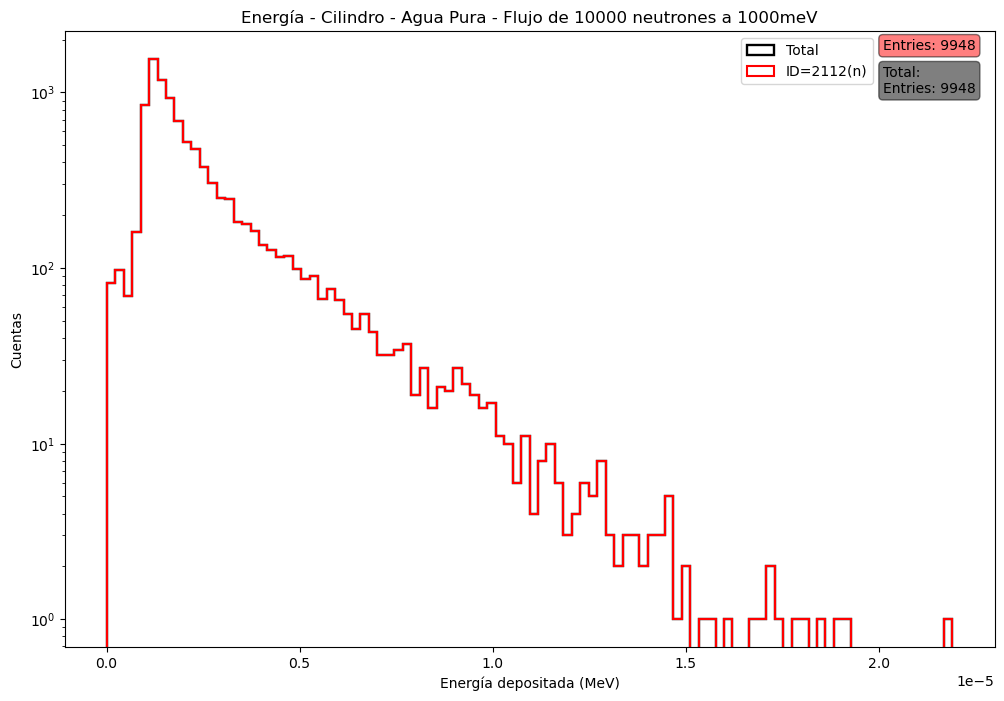

In [17]:
####################HISTOGRAMAS DE ENERGIA#########################################################
plt.figure(figsize=(12, 8))  # Cambia estos valores según tus preferencias
plt.hist(merged_df[merged_df.energy>0].energy, bins=100, histtype='step', color='black',label='Total',linewidth=1.7, log=True)

# Calcular estadísticas para el histograma de energía depositada
entries_energy = len(merged_df[merged_df.energy > 0].energy)
mean_energy = np.mean(merged_df[merged_df.energy > 0].energy)
rms_energy = np.std(merged_df[merged_df.energy > 0].energy)

# Agregar cuadro de texto para las estadísticas
stats_text_energy = f'Total:\nEntries: {entries_energy}'
plt.text(0.88, 0.90, stats_text_energy, transform=plt.gca().transAxes,bbox=dict(boxstyle='round', facecolor='black', alpha=0.5))
print(f"Start Plotting!!!")
for particle_id, colors,name in zip(particle_ids, particle_colors,particle_name):
    # Crea una máscara para filtrar las filas correspondientes al tipo de partícula especificado
    mask_particle = (merged_df['id'] == particle_id)
    # Aplica la máscara para obtener un DataFrame que contiene datos solo para el tipo de partícula especificado
    particle_df = merged_df[mask_particle]

 
    # Histograma
    plt.hist(particle_df[particle_df.energy > 0].energy, bins=100, histtype='step', label=f'ID={particle_id}({name})',linewidth=1.5,color=colors)

    # Calcular estadísticas para el histograma de energía depositada
    entries_particle = len(particle_df[particle_df.energy > 0].energy)
    mean_particle = np.mean(particle_df[particle_df.energy > 0].energy)
    rms_particle = np.std(particle_df[particle_df.energy > 0].energy)

    # Agregar cuadro de texto para las estadísticas
    stats_text_particle = f'Entries: {entries_particle}'
    plt.text(0.88, 0.97 - 0.115 * particle_ids.index(particle_id), stats_text_particle, transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round', facecolor=colors, alpha=0.5))
    plt.xlabel('Energía depositada (MeV)')
#plt.xlim(0, 0.2)
plt.ylabel('Cuentas')
plt.yscale('log')
plt.legend(loc='upper left', bbox_to_anchor=(0.72, 1))
plt.title('Energía - Cilindro - Agua Pura - Flujo de 10000 neutrones a 1000meV')
pdf_filename_stat = 'Energia_Cilindro_Agua_Pura_n1000meV.pdf'
plt.savefig(pdf_filename_stat, format='pdf')
plt.show()

In [19]:
##############GUARDA DATOS DE CARGA EN DIFERENTES ARCHIVOS ##############################################
unique_particle_ids = merged_df['id'].unique()

for particle_id, colors,name in zip(particle_ids, particle_colors,particle_name):
    # Crea una máscara para filtrar las filas correspondientes al tipo de partícula especificado
    mask_particle = (merged_df['id'] == particle_id)
    particle_data = merged_df[mask_particle]   
    # Obtener la columna 'carga' para esta partícula
    energy_data = particle_data['charge']
    # Definir el nombre del archivo de salida basado en el nombre de la partícula
    output_filename = f'particle_{name}_carga_A_P_1000meV.txt'
    # Guardar los datos de energía en el archivo
    energy_data.to_csv(output_filename, header=False, index=False)

Datos de carga guardados en 'Carga_Total_Agua_Pura_Neutrones_1eV.txt'


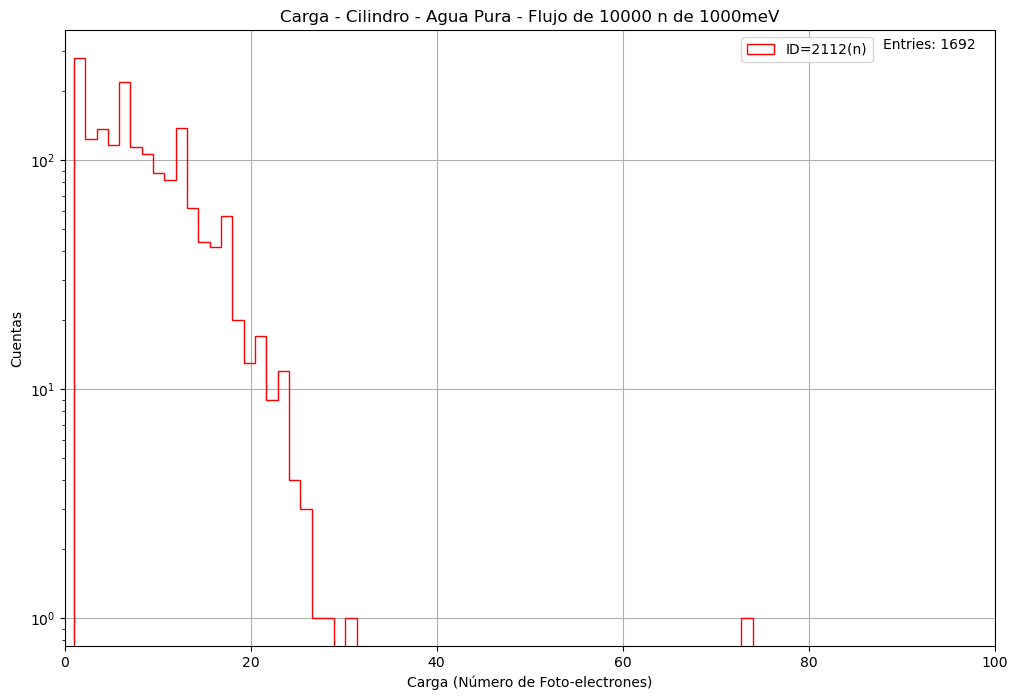

Numero de bins del histograma de carga total de agua + 2.5% de NaCl: 1692


ValueError: operands could not be broadcast together with shapes (1692,9) (59,) 

In [31]:
filtered_charge = merged_df[merged_df.charge >0].charge
# Guardar los datos en un archivo de texto
file_name = "Carga_Total_Agua_Pura_Neutrones_1eV.txt"
filtered_charge.to_csv(file_name, header=False, index=False)
print(f"Datos de carga guardados en '{file_name}'")

# Histograma de carga
# Crear una figura con un tamaño personalizado (ancho x alto)
plt.figure(figsize=(12, 8))  # Cambia estos valores según tus preferencias
#plt.hist(merged_df[merged_df.charge>=0].charge, bins=100, histtype='step', color='black',label='Total',linewidth=1.7, log=True)
#hist, bin_edges, _ = plt.hist(merged_df[merged_df.charge>0].charge, bins=100, histtype='step', color='black',label='Total',linewidth=1.7, log=True)

entries_charge = len(merged_df[merged_df.charge > 0].charge)
mean_charge = np.mean(merged_df[merged_df.charge > 0].charge)
rms_charge = np.std(merged_df[merged_df.charge > 0].charge)

# Agregar cuadro de texto para las estadísticas
#stats_text_charge = f'Entries: {entries_charge}'
#plt.text(0.74, 0.45, stats_text_charge, transform=plt.gca().transAxes,bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Agregar cuadro de texto para las estadísticas
stats_text_charge = f'Entries: {entries_charge}'
#plt.text(0.88, 0.92, stats_text_charge, transform=plt.gca().transAxes,bbox=dict(boxstyle='round', facecolor='red', alpha=0.5))

# Guardar los datos del histograma en un archivo de texto
#with open('Histograma_Total_Agua_Pura_Neutrones_500MeV.txt', 'w') as archivo:
#    archivo.write('Bin Inicio, Bin Fin, Frecuencia\n')
#    for i in range(len(hist)):
#        archivo.write(f'{bin_edges[i]:.3f}, {bin_edges[i+1]:.3f}, {hist[i]}\n')

#print('Datos del histograma de carga guardados en "datos_histograma_carga_total_Agua_Pura.txt"')


for particle_id, colors,name in zip(particle_ids, particle_colors,particle_name):
    # Crea una máscara para filtrar las filas correspondientes al tipo de partícula especificado
    mask_particle = (merged_df['id'] == particle_id)

    # Aplica la máscara para obtener un DataFrame que contiene datos solo para el tipo de partícula especificado
    particle_df = merged_df[mask_particle]

    # Histograma de carga
    plt.hist(particle_df[particle_df.charge > 0].charge, bins=60, histtype='step', label=f'ID={particle_id}({name})',linewidth=1.0,color=colors)

    # Calcular estadísticas para el histograma de carga
    entries_particle = len(particle_df[particle_df.charge > 0].charge)
    mean_particle = np.mean(particle_df[particle_df.charge > 0].charge)
    rms_particle = np.std(particle_df[particle_df.charge > 0].charge)

    

    # Agregar cuadro de texto para las estadísticas de carga
    stats_text_charge = f'Entries: {entries_particle}'
    plt.text(0.88, 0.97 - 0.115 * particle_ids.index(particle_id), stats_text_charge, transform=plt.gca().transAxes)

    plt.xlabel('Carga (Número de Foto-electrones)')
plt.xlim(0, 100)
plt.ylabel('Cuentas')
plt.yscale('log')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(0.72, 1))
plt.title('Carga - Cilindro - Agua Pura - Flujo de 10000 n de 1000meV')
pdf_filename_stat_charge = 'Carga_Cilindro_Agua_n-1000meV.pdf'
plt.savefig(pdf_filename_stat_charge, format='pdf')
plt.savefig('Carga_Cilindro_Agua_n-1000meV.jpg', format='jpg')
#plt.savefig('e-compt-500MeV-H2O-pur10NaCl.jpg', format='jpg')
# Mostrar el gráfico
plt.show()

print(f"Numero de bins del histograma de carga total de agua + 2.5% de NaCl: {entries_particle}")

integral = np.trapz(np.histogram(particle_df[particle_df.charge > 0], bins=60)[0], dx=particle_df[particle_df.charge > 0])
print(f"Integral del histograma e- de Agua + 2.5% de NaCl: {integral}")     

Datos de carga guardados en 'Carga_Total_Agua_Pura_Neutrones_1eV.txt'
Integral del histograma (área bajo la curva): 1235.1599999999999


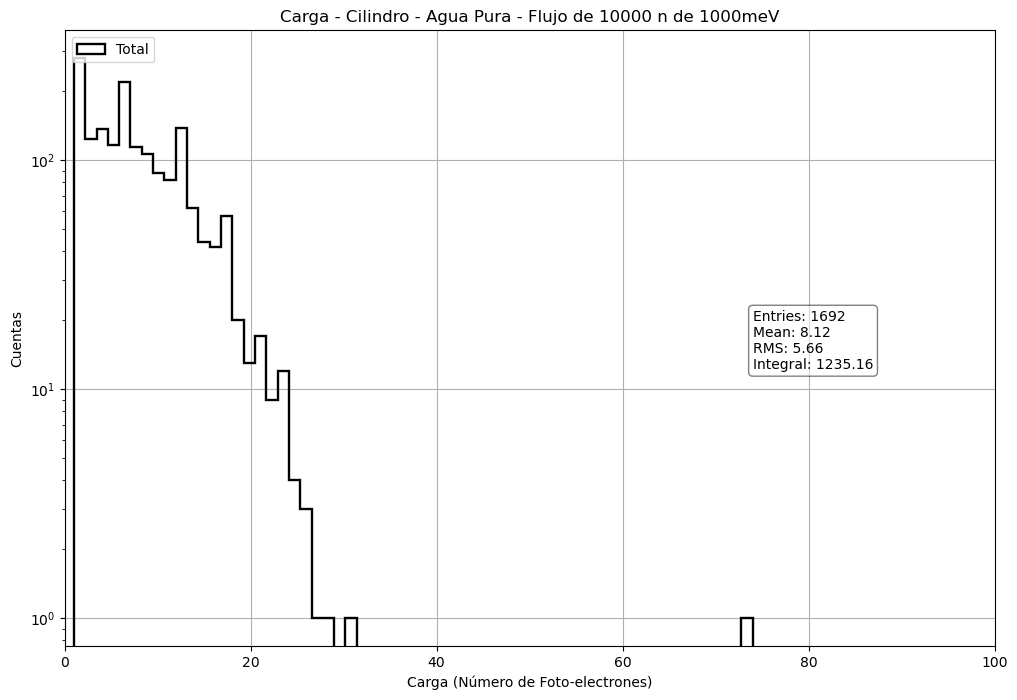

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Filtrar los valores de carga mayores a 0
filtered_charge = merged_df[merged_df.charge > 0].charge

# Guardar los datos en un archivo de texto
file_name = "Carga_Total_Agua_Pura_Neutrones_1eV.txt"
filtered_charge.to_csv(file_name, header=False, index=False)
print(f"Datos de carga guardados en '{file_name}'")

# Crear una figura para el histograma
plt.figure(figsize=(12, 8))

# Generar el histograma y obtener los valores y bordes de los bins
hist, bin_edges = np.histogram(merged_df[merged_df.charge > 0].charge, bins=100)

# Calcular la integral del histograma (área bajo la curva)
integral_hist = np.sum(hist * np.diff(bin_edges))

# Mostrar el valor de la integral
print(f"Integral del histograma (área bajo la curva): {integral_hist}")

# Histograma de carga
plt.hist(merged_df[merged_df.charge > 0].charge, bins=60, histtype='step', color='black', label='Total', linewidth=1.7, log=True)

# Estadísticas
entries_charge = len(merged_df[merged_df.charge > 0].charge)
mean_charge = np.mean(merged_df[merged_df.charge > 0].charge)
rms_charge = np.std(merged_df[merged_df.charge > 0].charge)

# Cuadro de texto para las estadísticas
stats_text_charge = f'Entries: {entries_charge}\nMean: {mean_charge:.2f}\nRMS: {rms_charge:.2f}\nIntegral: {integral_hist:.2f}'
plt.text(0.74, 0.45, stats_text_charge, transform=plt.gca().transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Configuraciones adicionales
plt.xlabel('Carga (Número de Foto-electrones)')
plt.ylabel('Cuentas')
plt.yscale('log')
plt.grid(True)
plt.xlim(0, 100)
plt.legend(loc='upper left')
plt.title('Carga - Cilindro - Agua Pura - Flujo de 10000 n de 1000meV')

# Guardar el gráfico
pdf_filename_stat_charge = 'Carga_Cilindro_Agua_n-1000meV.pdf'
plt.savefig(pdf_filename_stat_charge, format='pdf')
plt.savefig('Carga_Cilindro_Agua_n-1000meV.jpg', format='jpg')

# Mostrar el gráfico
plt.show()
